<a href="https://colab.research.google.com/github/leadymunte/Damin-Tugas2/blob/master/damin_Tugas2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use
from matplotlib import style
from google.colab import files
from collections import Counter

In [261]:
uploaded = files.upload()

In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [422]:
dtrain=pd.read_csv("datasetBaru - Copy.csv",sep='\t',delimiter=';')
dtrain.head()

,latitude,longitude,bright_ti4,scan,track
0,-724.685,11.234.071,304.05.00,0.38,0.58
1,-724.858,11.234.313,301.05.00,0.38,0.58
2,-730.268,11.236.498,303.04.00,0.37,0.58
3,-737.448,11.251.962,305.02.00,0.36,0.58
4,-737.333,11.219.071,304.06.00,0.38,0.59


In [346]:
dtrain.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 5 columns):
latitude      298 non-null float64
longitude     298 non-null object
bright_ti4    298 non-null object
scan          298 non-null float64
track         298 non-null float64
dtypes: float64(3), object(2)
memory usage: 11.8+ KB


In [354]:
dtrain.describe()

,latitude,scan,track
count,298.000000,298.000000,298.000000
mean,-380.995486,0.409027,0.372047
std,469.631420,0.111389,0.129922
min,-985.067000,0.040000,0.040000
25%,-811.757000,0.410000,0.370000
50%,-677.836500,0.440000,0.390000
75%,169.434500,0.450000,0.410000
max,488.711000,0.570000,0.590000


In [355]:
dtrain.head()

,latitude,longitude,bright_ti4,scan,track
0,-724.685,11.234.071,304.05.00,0.38,0.58
1,-724.858,11.234.313,301.05.00,0.38,0.58
2,-730.268,11.236.498,303.04.00,0.37,0.58
3,-737.448,11.251.962,305.02.00,0.36,0.58
4,-737.333,11.219.071,304.06.00,0.38,0.59


In [349]:
print(dtrain.columns.values)

['latitude' 'longitude' 'bright_ti4' 'scan' 'track']


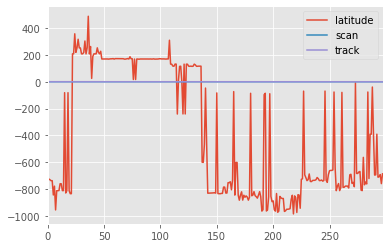

In [380]:
dtrain.plot()

In [382]:
df = dtrain
print(df)

     latitude   longitude bright_ti4  scan  track
0    -724.685  11.234.071  304.05.00  0.38   0.58
1    -724.858  11.234.313  301.05.00  0.38   0.58
2    -730.268  11.236.498  303.04.00  0.37   0.58
3    -737.448  11.251.962  305.02.00  0.36   0.58
4    -737.333  11.219.071  304.06.00  0.38   0.59
..        ...         ...        ...   ...    ...
293  -711.318  10.936.131  331.06.00  0.04   0.45
294  -707.731  10.958.936  339.08.00  0.39   0.44
295  -691.757  10.943.207  343.08.00  0.04   0.44
296  -759.341  10.956.709  330.06.00  0.04   0.44
297  -686.108  11.079.722  333.05.00  0.05   0.41

[298 rows x 5 columns]


In [426]:
df = dtrain.drop(['longitude' , 'bright_ti4' , 'scan'] , axis=1)
df

,latitude,track
0,-724.685,0.58
1,-724.858,0.58
2,-730.268,0.58
3,-737.448,0.58
4,-737.333,0.59
...,...,...
293,-711.318,0.45
294,-707.731,0.44
295,-691.757,0.44
296,-759.341,0.44


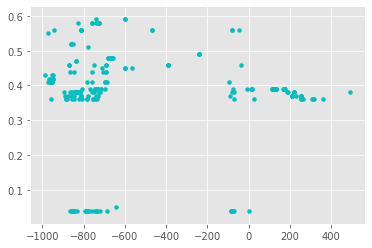

In [487]:
#untuk melihat visualisasi data
plt.scatter(df.latitude, df.track, s=15,c="c", marker="o", alpha = 1)

In [489]:
#untuk membuat cluster

df_x = df.iloc[:,0:2]
df_x.head()

,latitude,track
0,-724.685,0.58
1,-724.858,0.58
2,-730.268,0.58
3,-737.448,0.58
4,-737.333,0.59


In [490]:
#mengubah data frame menjadi sebuah array terlebih dahulu sebelum menentukan nilai K
x_array = np.array(df_x)
print(x_array)

[[-7.24685e+02  5.80000e-01]
 [-7.24858e+02  5.80000e-01]
 [-7.30268e+02  5.80000e-01]
 [-7.37448e+02  5.80000e-01]
 [-7.37333e+02  5.90000e-01]
 [-8.43923e+02  3.70000e-01]
 [-7.78068e+02  5.10000e-01]
 [-9.55433e+02  3.60000e-01]
 [-8.11809e+02  5.60000e-01]
 [-8.11417e+02  5.60000e-01]
 [-8.11116e+02  5.60000e-01]
 [-7.59989e+02  5.80000e-01]
 [-7.60274e+02  5.80000e-01]
 [-8.11255e+02  5.60000e-01]
 [-8.11214e+02  5.60000e-01]
 [-8.11460e+01  5.60000e-01]
 [-8.29078e+02  5.80000e-01]
 [-8.11538e+02  5.60000e-01]
 [-8.11730e+01  5.60000e-01]
 [-8.11773e+02  5.60000e-01]
 [-8.34153e+02  4.70000e-01]
 [-8.34218e+02  4.70000e-01]
 [ 2.08472e+02  3.70000e-01]
 [ 2.08412e+02  3.70000e-01]
 [ 3.57782e+02  3.60000e-01]
 [ 2.19473e+02  3.80000e-01]
 [ 2.52647e+02  3.70000e-01]
 [ 3.17117e+02  3.60000e-01]
 [ 2.52705e+02  3.70000e-01]
 [ 2.52309e+02  3.70000e-01]
 [ 2.08459e+02  3.70000e-01]
 [ 2.08188e+02  3.70000e-01]
 [ 2.18775e+02  3.80000e-01]
 [ 3.04096e+02  3.60000e-01]
 [ 2.07844e+02

In [491]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.17667654, 0.98181818],
       [0.17655916, 0.98181818],
       [0.17288832, 0.98181818],
       [0.16801649, 0.98181818],
       [0.16809452, 1.        ],
       [0.09577019, 0.6       ],
       [0.14045467, 0.85454545],
       [0.02010751, 0.58181818],
       [0.11756045, 0.94545455],
       [0.11782643, 0.94545455],
       [0.11803067, 0.94545455],
       [0.15272178, 0.98181818],
       [0.1525284 , 0.98181818],
       [0.11793635, 0.94545455],
       [0.11796417, 0.94545455],
       [0.61333593, 0.94545455],
       [0.10584294, 0.98181818],
       [0.11774433, 0.94545455],
       [0.61331761, 0.94545455],
       [0.11758487, 0.94545455],
       [0.10239941, 0.78181818],
       [0.10235531, 0.78181818],
       [0.80984992, 0.6       ],
       [0.80980921, 0.6       ],
       [0.91116098, 0.58181818],
       [0.81731441, 0.61818182],
       [0.83982391, 0.6       ],
       [0.88356862, 0.58181818],
       [0.83986326, 0.6       ],
       [0.83959457, 0.6       ],
       [0.

In [514]:
#digunakan untuk mengelompokkan data menjadi 6 cluster
kmeans = KMeans(n_clusters=6, random_state=125)
#digunakan untuk menentukan nilai K dari data
kmeans.fit(x_scaled) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=125, tol=0.0001, verbose=0)

In [0]:
#menentukan pusat cluster
centroids = kmeans.cluster_centers_

labels = kmeans.labels_

In [516]:
print("Centroids : ")
print(centroids)
print ("Labels : ")
print(labels)

Centroids : 
[[1.11941076e-01 6.38086124e-01]
 [7.76226347e-01 6.26656394e-01]
 [1.29260762e-01 6.73400673e-04]
 [1.71896558e-01 8.83370288e-01]
 [6.23726353e-01 0.00000000e+00]
 [5.12258846e-01 8.28099174e-01]]
Labels : 
[3 3 3 3 3 0 3 0 3 3 3 3 3 3 3 5 3 3 5 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 5 1 1 1 4 5 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 5 3 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 3 2 0 2 0 0 2 3 2 2 0 3 4 2 2 0 3
 2 2 2 0 0 0 0 1 4 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3
 0 0 3 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 4 2 3 0 3 3 3 3 1 2 0 0 0
 0 2 4 2 2 2 2 2 2 3 3 0 2 0 1 3 3 3 3 0 0 3 0 0 2 4 2 5 5 5 5 0 0 5 0 0 0
 0 0]


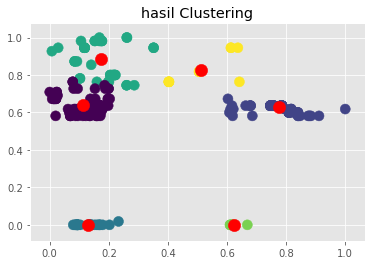

In [517]:
output= plt.scatter(x_scaled[:,0],x_scaled[:,1],s=100, c=labels, marker="o",alpha=1)

centers = centroids
plt.scatter(centers[:,0],centers[:,1],c='red', s=150, alpha=1, marker="o");
plt.title("hasil Clustering")
#plt.colorbar(output)

plt.show()